In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing my Spotify listening activity between 04.03.2021 00:00 and 04.03.2022 22:20

In [2]:
data = pd.read_json("2022-03-04-spotify.json")

In [3]:
data["endTime"] = pd.to_datetime(data["endTime"], format='%Y-%m-%d %H:%M')
data["month"] = data["endTime"].dt.to_period("M")

In [4]:
data.head()

,endTime,artistName,trackName,msPlayed,month
0,2021-03-04 00:02:00,Architects,Dying Is Absolutely Safe,299013,2021-03
1,2021-03-04 00:05:00,Architects,Death Is Not Defeat,225040,2021-03
2,2021-03-04 00:10:00,Architects,Hereafter,255586,2021-03
3,2021-03-04 00:13:00,Architects,Mortal After All,219773,2021-03
4,2021-03-04 00:18:00,Architects,Holy Hell,253973,2021-03


In [5]:
artist_month = data.pivot_table(values="msPlayed", columns="month", index="artistName", margins=True, fill_value="0", aggfunc=np.sum)
artist_month = artist_month.sort_values(by='All', ascending=False)
artist_month = artist_month[artist_month["All"] != 0]
artist_month = artist_month.drop(index=['All'])
del(artist_month['All'])

In [6]:
artist_month[:10]

month,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
artistName,,,,,,,,,,,,,
Tristam,38561092.0,103819909.0,67421186.0,45759039.0,8384051.0,21082347.0,25976707.0,16338292.0,16198019.0,42075194.0,20017786.0,16814081.0,3441726.0
ILLENIUM,6563265.0,1867282.0,6162735.0,4864156.0,19632684.0,13338372.0,13629200.0,12611913.0,65877389.0,37353173.0,39978928.0,17769305.0,1935307.0
Architects,51294221.0,26077763.0,36132546.0,24996171.0,38028417.0,24550736.0,13163429.0,3228658.0,3010222.0,4752912.0,4229447.0,1721787.0,0
Dabin,1865661.0,515000.0,4400302.0,5059057.0,1467570.0,843122.0,2335484.0,1217884.0,9005389.0,22682359.0,72184596.0,34794316.0,24209121.0
Seven Lions,9991748.0,6453686.0,3532502.0,5490138.0,12008038.0,9797441.0,16467303.0,21611748.0,12679889.0,14283673.0,27380691.0,14138287.0,4375420.0
Sullivan King,5055743.0,1398048.0,1497427.0,29623495.0,27936175.0,7336617.0,8046804.0,19154626.0,16893357.0,13239254.0,18143590.0,6117522.0,0
Au5,20146382.0,6606471.0,7562658.0,15261850.0,12903331.0,7057593.0,7005163.0,16422870.0,8544474.0,10268843.0,15124287.0,8685516.0,1555863.0
Ran-D,5964951.0,802228.0,0,11482143.0,3221830.0,8057539.0,37073727.0,5117337.0,7111819.0,8872001.0,18177318.0,6850730.0,0
Trivecta,12008094.0,1924202.0,8095245.0,7466412.0,4807980.0,6681158.0,3919072.0,8289925.0,1436565.0,9309883.0,19711508.0,14818081.0,2022080.0


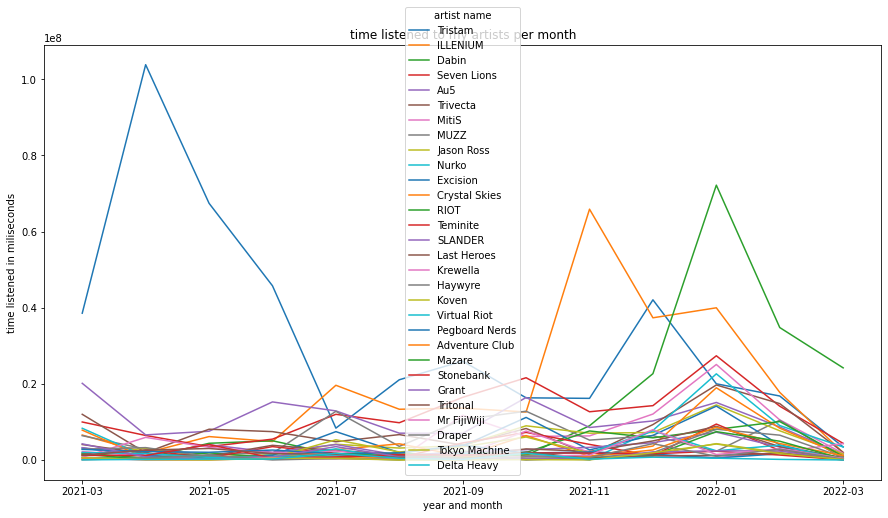

In [7]:
ax = artist_month.T.plot(title = "time listened to my artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

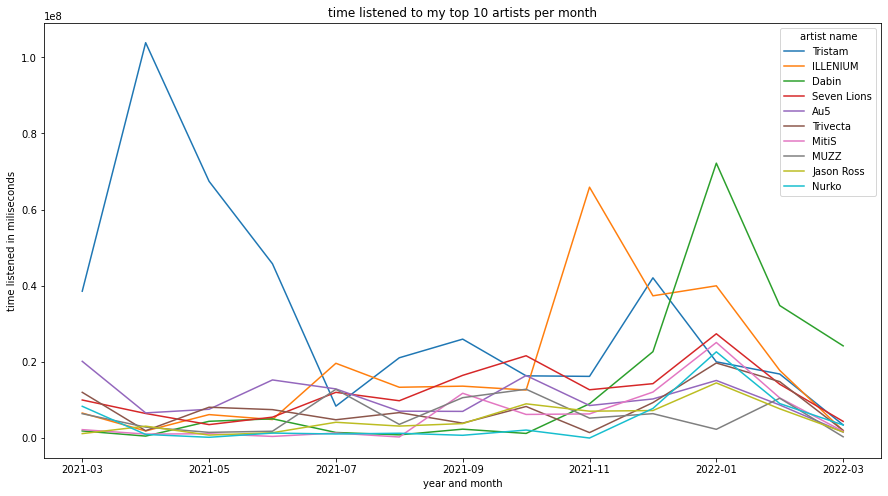

In [8]:
ax = artist_month[:20].T.plot(title = "time listened to my top 10 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

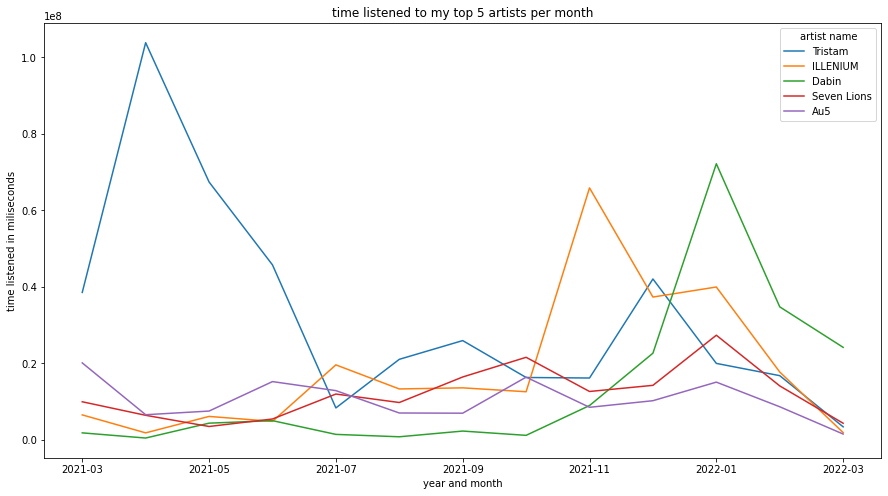

In [9]:
ax = artist_month[:8].T.plot(title = "time listened to my top 5 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")